In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **method 1 for calculating k**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,:7],data.iloc[:,-1],test_size=0.20,random_state=42)
# scaler=StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=int(math.sqrt(X_train.shape[0])+1))
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

#**Method 2 for finding the K value using the Trail and error**

In [ ]:
# max_accuracy=0
# k=1
# for i in range(1,X_train.shape[0],2):
#   knn=KNeighborsClassifier(n_neighbors=i)
#   knn.fit(X_train,y_train)
#   y_pred=knn.predict(X_test)
#   if(accuracy_score(y_test,y_pred)>max_accuracy):
#     max_accuracy=accuracy_score(y_test,y_pred)
#     k=i
knn=KNeighborsClassifier(n_neighbors=31)#k=31
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7207792207792207


##**Applying the KNN classifier on iris dataset**

In [ ]:
iris_data=sns.load_dataset("iris")
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:

X=iris_data.iloc[:,:4]
y=iris_data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
knn=KNeighborsClassifier(n_neighbors=int(np.sqrt(X_train.shape[0])))
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)
def predict(knn,sepalLength,sepalWidth,petalLength,petalWidth):
  return knn.predict(np.array([[sepalLength,sepalWidth,petalLength,petalWidth]]))
sepalLength=float(input("Enter the sepal length: "))
sepalWidth=float(input("Enter the sepal width: "))
petalLength=float(input("Enter the petal length: "))
petalWidth=float(input("Enter the petal width: "))
print("Species: ",predict(knn,sepalLength,sepalWidth,petalLength,petalWidth))

Enter the sepal length: 5.0
Enter the sepal width: 3.6
Enter the petal length: 1.4
Enter the petal width: 0.2
Species:  ['setosa']


Text(0, 0.5, 'Y-axis')

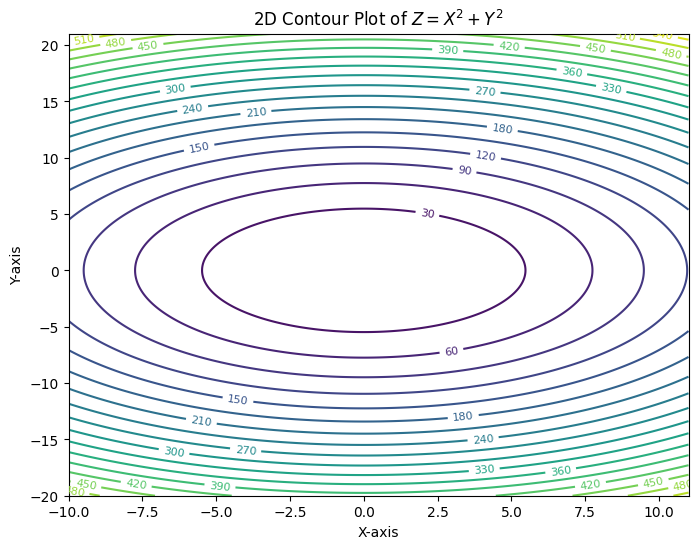

In [ ]:
a=np.linspace(-10,11,1000)
b=np.linspace(-20,21,1000)
XX,YY=np.meshgrid(a,b)
Z=XX**2+YY**2
plt.figure(figsize=(8, 6))
contour = plt.contour(XX, YY, Z, levels=20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)  # Add labels to contours
plt.title('2D Contour Plot of $Z = X^2 + Y^2$')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

##**Decision boundary for the KNN classifier**

### **trainine the model:**

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_informative=1,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           n_classes=2,
                           random_state=41,class_sep=0.8)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)
accuracy_score(y_test,knn.predict(X_test))

0.88

##**Creating the mesh Grid:**

In [ ]:
x=np.arange(X_train[:,0].min(),X_train[:,0].max(),0.01)
y=np.arange(X_train[:,1].min(),X_train[:,1].max(),0.01)
XX,YY=np.meshgrid(x,y)

## **Classifying the points:**

In [ ]:
data=np.array([XX.ravel(),YY.ravel()]).T
print(data.shape)
#predicting the labels for all the points in the data
labels=knn.predict(data)
labels

(383311, 2)


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
labels.shape

(383311,)

## **plotting the decision boundary:**

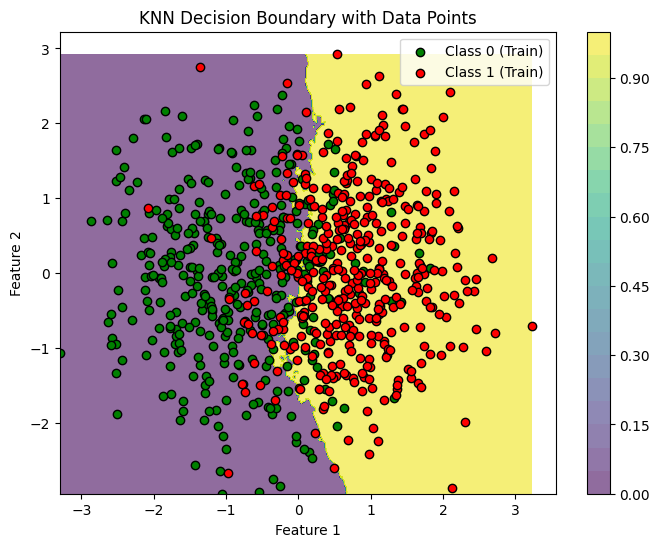

In [ ]:
plt.figure(figsize=(8, 6))
# Plot the decision boundary
contour = plt.contourf(XX, YY, labels.reshape(XX.shape), levels=20, cmap='viridis', alpha=0.6)
plt.colorbar(contour)
# Plot the data points
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color="green", edgecolor="k", label="Class 0 (Train)")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="red", edgecolor="k", label="Class 1 (Train)")
# plt.scatter(X_test[:, 0], X_test[:, 1], color="blue", edgecolor="k", label="Test Points", alpha=0.6)
# Adding titles and labels
plt.title('KNN Decision Boundary with Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.show()

##**Building KNN Classifier from Scratch:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
#loading the dataset and splitting the data into train and test data
data=pd.read_csv("/content/diabetes.csv")
X=data.iloc[:,:7]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import numpy as np
from collections import Counter
class KNNClassifier:
    def __init__(self, k):
        self.k = k
    def fit(self, X_train, y_train):
        self.X_train = X_train.reset_index(drop=True)
        self.y_train = y_train.reset_index(drop=True)
    def predict(self, X_test):
        y_pred = []
        for i in range(X_test.shape[0]):
            distances = np.sqrt(np.sum((self.X_train - X_test.iloc[i]) ** 2, axis=1))
            k_nearest_indices = np.argsort(distances)[:self.k]
            y_pred.append(self.classify(k_nearest_indices))
        return np.array(y_pred)
    def classify(self, k_nearest_indices):
        k_nearest_labels = self.y_train.iloc[k_nearest_indices]
        return Counter(k_nearest_labels).most_common(1)[0][0]

In [ ]:
knn=KNNClassifier(k=3)
knn.fit(X_train,y_train)
knn.predict(X_test)
accuracy_score(y_test,knn.predict(X_test))

0.6688311688311688

##**Effect of K on The Model:**

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_informative=1,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           n_classes=2,
                           random_state=41,class_sep=0.8)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def plot_decision_boundary(X, y, k):
    # Convert inputs to NumPy arrays if they're pandas objects
    X = np.array(X)
    Y = np.array(y)
    # Check dimensions of X and y
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x = np.arange(x_min, x_max, 0.1)
    y = np.arange(y_min, y_max, 0.1)
    XX, YY = np.meshgrid(x, y)
    # Flatten the grid to pass through the classifier
    grid_points = np.c_[XX.ravel(), YY.ravel()]
    # Train KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, Y)
    # Predict labels for the grid
    labels = knn.predict(grid_points)
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(XX, YY, labels.reshape(XX.shape), levels=20, cmap="viridis", alpha=0.6)
    plt.colorbar(label="Predicted Label")
    # Plot the data points
    plt.scatter(X[Y == 0,0], X[Y == 0,1], color="green", edgecolor="k", label="Class 0 (Train)",alpha=0.7)
    plt.scatter(X[Y == 1,0], X[Y == 1,1], color="red", edgecolor="k", label="Class 1 (Train)",alpha=0.7)
    # Add titles and labels
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


##**For K=1:**

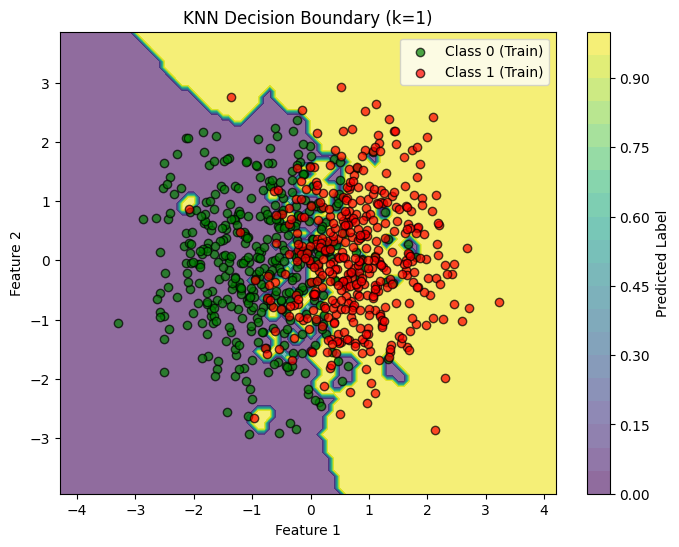

In [ ]:
#decision boundary for k value 1
plot_decision_boundary(X_train,y_train,1)

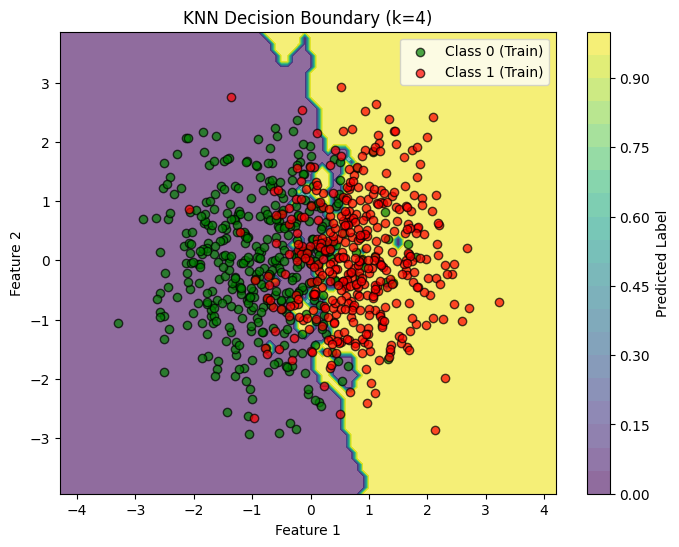

In [ ]:
#decision boundary for k value 4
plot_decision_boundary(X_train,y_train,4)

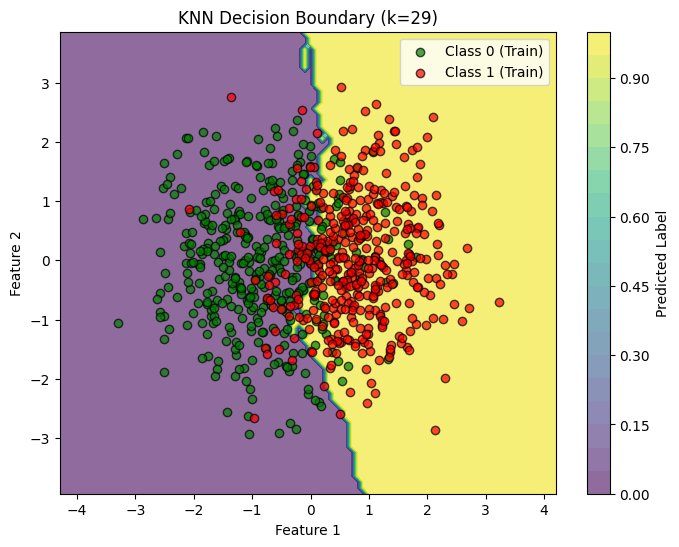

In [ ]:
#decision boundary for k value sqrt(n)
plot_decision_boundary(X_train,y_train,int(np.sqrt(X_train.shape[0]))+1)

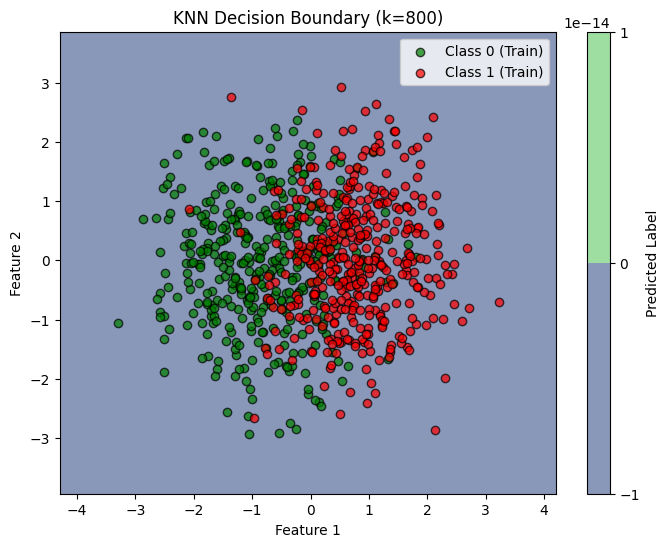

In [ ]:
#decision boundary for k value n.. In this case the model will predict in test data as the class having the highest data points
plot_decision_boundary(X_train,y_train,X_train.shape[0])